# UFC Weight and Height analysis
**Weight cutting for a fight**

When people heard the word 'Fighter', most of them might think that fighters are stereotypicaly looking buff and muscular with veins hanging out on their skins just like in the Hollywood movies. 

![title](movies.jpg)

Well, the real world is kinda slapping them on the face, because this is what the real fighters are actually look like:

![title](fighters.jpg)


I'm exaggerating a little bit, actually there are fighters that have a tough looking too and what's more interesting is they choose to look how they want be! Fat, skinny or muscular are all based on their strategy of how they want to fight!


Take Conor McGregor for example in the picture below, he is 5'9 (175cm) tall and there is undoubtly big differences in looks between each weight class he fought for.

![title](conor.jpg)

**Does height in certain weight class affects performance?**
    
Looking at Conor when he was in the 145lbs division (65kg), he really destroyed everyone as if he is unstoppable with his striking abilities. He even won the belt from the #1P4P Jose Aldo knocking him out with a punch within 14 seconds. However at 170lbs (77kg) he has shown fatigue, slowness in his strikings and decided to grapple but was too late which he eventually lost to Nate Diaz who was a ranked #5 welterweight.

Another example would be Daniel Cormier, Demetrious Johnson, or Chad Mendes who are really short for their division but they utilize their wrestling a lot. Whilst the taller ones like Israel Adesanya and Max Holloway always win their fights with a KO. 

so hypothetically, tall-skinnier fighters tend to stand up more and finish the fight with a KO while the short-stockier ones tend to wrestle more and finish with a submission.

But those are just expressed from the way we see them fight visually and just from a couple famous example. There are 2318 UFC fights until now (2019) which from those we will try to analyze and conclude some facts based on the statistic of the fights and we might find the following things below:
- What weight class division do X cm fighters prefer to fight for?
- Comparison of frequencies in striking methods between two subjects with different heights in the same weight class
- Comparison of frequencies in grappling methods between two subjects with different heights in the same weight class

So the purpose of this analysis is not only to confirm our hypothesis, but also to determine the viewers what is the most suitable weight class and fighting style for them.
 

**Data Understanding**

Before we jump into the analysis, first we will need to understand the characteristic of the data we have.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.shape

(2318, 894)

In [4]:
df_data=pd.read_csv('data.csv')
print(df_data.columns.values)

['BPrev' 'BStreak' 'B_Age' 'B_Height' 'B_HomeTown' 'B_ID' 'B_Location'
 'B_Name' 'B_Weight' 'B__Round1_Grappling_Reversals_Landed'
 'B__Round1_Grappling_Standups_Landed'
 'B__Round1_Grappling_Submissions_Attempts'
 'B__Round1_Grappling_Takedowns_Attempts'
 'B__Round1_Grappling_Takedowns_Landed'
 'B__Round1_Strikes_Body Significant Strikes_Attempts'
 'B__Round1_Strikes_Body Significant Strikes_Landed'
 'B__Round1_Strikes_Body Total Strikes_Attempts'
 'B__Round1_Strikes_Body Total Strikes_Landed'
 'B__Round1_Strikes_Clinch Body Strikes_Attempts'
 'B__Round1_Strikes_Clinch Body Strikes_Landed'
 'B__Round1_Strikes_Clinch Head Strikes_Attempts'
 'B__Round1_Strikes_Clinch Head Strikes_Landed'
 'B__Round1_Strikes_Clinch Leg Strikes_Attempts'
 'B__Round1_Strikes_Clinch Leg Strikes_Landed'
 'B__Round1_Strikes_Clinch Significant Kicks_Attempts'
 'B__Round1_Strikes_Clinch Significant Kicks_Landed'
 'B__Round1_Strikes_Clinch Significant Punches_Attempts'
 'B__Round1_Strikes_Clinch Significant Punc

In [5]:
for i in range(len(df_data.columns.values)):
    if df_data.columns.values[i][3:8] != 'Round':
        print(df_data.columns.values[i])

BPrev
BStreak
B_Age
B_Height
B_HomeTown
B_ID
B_Location
B_Name
B_Weight
Date
Event_ID
Fight_ID
Last_round
Max_round
RPrev
R_Age
R_Height
R_HomeTown
R_ID
R_Location
R_Name
R_Weight
winby
winner


In [6]:
for i in data["B_Name"]:
    for y in data["B_Name"][1:]:
        if i == y:
            print(y)
            break


Alistair Overeem
Ricardo Lamas
Urijah Faber
Danny Martinez
Tom Watson
Alan Patrick
Kevin Lee
Rashid Magomedov
Gasan Umalatov
Ali Bagautinov
Abel Trujillo
Andy Enz
Gegard Mousasi
Francis Carmont
Joe Proctor
Nico Musoke
Andy Ogle
Zubaira Tukhugov
Ivan Jorge
Wilson Reis
Maximo Blanco
Takenori Sato
Albert Tumenov
Hyun Gyu Lim
Sean Soriano
Luiz Dutra
Shunichi Shimizu
Quinn Mulhern
Jon Delos Reyes
Tae Hyun Bang
Will Chope
Dave Galera
Russell Doane
Jimi Manuwa
Ilir Latifi
Neil Seery
Omari Akhmedov
Danny Mitchell
Claudio Silva
Mats Nilsson
Louis Gaudinot
Demian Maia
TJ Waldburger
Pedro Munhoz
Stephen Thompson
Sara McMann
Jessica Eye
Aljamain Sterling
Erik Koch
Joshua Sampo
Yosdenis Cedeno
Elias Silverio
Sam Sicilia
Mike Easton
Costas Philippou
Brad Tavares
Brian Houston
Beneil Dariush
Justin Edwards
Derek Brunson
Garett Whiteley
Dustin Ortiz
Louis Smolka
Gabriel Gonzaga
Hugo Viana
Josh Thomson
Jeremy Stephens
Jesse Ronson
Melvin Guillard
Patrick Cummins
Yaotzin Meza
Rob Whiteford
Charlie Brenn

Antonio Dos Santos
Magomed Mustafaev
Arnold Allen
Masio Fullen
Jessica Penne
Steve Kennedy
Tony Ferguson
Todd Duffee
Matt Dwyer
Manvel Gamburyan
James Moontasri
Sean Strickland
Lyman Good
Sarah Moras
Marion Reneau
Yaotzin Meza
Ildemar Alcantara
Masanori Kanehara
Renan Barao
Paul Felder
Jessica Eye
Takanori Gomi
Tom Lawlor
Andrew Holbrook
Danny Castillo
Dominique Steele
Ben Saunders
Bryan Caraway
Elizabeth Phillips
Yoel Romero
Steve Bosse
Levan Makashvili
Eddie Gordon
Lorenz Larkin
Joe Merritt
Lewis Gonzalez
Tony Sims
Sirwan Kakai
Stephen Thompson
Cezar Ferreira
Jerrod Sanders
Willie Gates
Mike de la Torre
Dominic Waters
Hayder Hassan
Vicente Luque
Caio Magalhaes
Trevor Smith
Paul Redmond
Pawel Pawlak
Leonardo Mafra
Ivan Jorge
Cortney Casey
Thales Leites
Evan Dunham
Chris de la Rocha
Teemu Packalen
Vaughan Lee
Jimmie Rivera
Ovince Saint Preux
Roman Salazar
Jonathan Wilson
Tim Johnson
Beneil Dariush
Scott Holtzman
Amanda Nunes
Tom Watson
Willie Gates
Sam Alvey
Geane Herrera
Sirwan Kakai


Eric Spicely
Tony Ferguson
Rashid Magomedov
Heather Jo Clark
Marcin Held
Felipe Arantes
Jason Novelli
Max Griffin
Douglas Silva de Andrade
Chris Avila
Alex Nicholson
Charles Oliveira
Claudio Puelles
Dan Henderson
Gegard Mousasi
Jimi Manuwa
Daniel Omielanczuk
Adriano Martins
Iuri Alcantara
Damian Stasiak
Albert Tumenov
Russell Doane
Marc Diakiese
Mike Perry
Jeremy Stephens
Tim Boetsch
Katlyn Chookagian
Karolina Kowalkiewicz
Belal Muhammad
Thiago Alves
Conor McGregor
Stephen Thompson
Yoel Romero
Michael Johnson
Uriah Hall
Amanda Cooper
Stevie Ray
Alexander Yakovlev
Magomed Mustafaev
Mark Godbeer
Alexander Volkov
Teruto Ishihara
Jack Marshman
Milana Dudieva
Ali Bagautinov
Kwan Ho Kwak
Rogerio Nogueira
Christian Colombo
Krzysztof Jotko
Manvel Gamburyan
Cortney Casey
Justin Scoggins
Jack Hermansson
Kamaru Usman
Albert Morales
Zak Ottow
Gadzhimurad Antigulov
Darren Stewart
Chris Camozzi
Derek Brunson
Jonathan Meunier
Andrew Holbrook
Omari Akhmedov
Jon Tuck
Geane Herrera
Alexander Volkanovski

Shana Dobson
Emily Whitmire
Francis Ngannou
Jose Aldo
Justin Gaethje
Sergio Pettis
Drakkar Klose
Cortney Casey
Angela Magana
Dominick Reyes
Paul Felder
Michelle Waterson
Abdul Razak Alhassan
Yancy Medeiros
Allen Crowder
Carla Esparza
Matheus Nicolau
Neil Magny
Michal Oleksiejczuk
Edson Barboza
Rick Glenn
Omari Akhmedov
Holly Holm
Mark De La Rosa
Liz Carmouche
Darrell Horcher
Markus Perez
Trevin Giles
Alex Perez
Davi Ramos
Brian Ortega
Andre Soukhamthath
Merab Dvalishvili
Iuri Alcantara
Benito Lopez
Gabriel Benitez
Jessica Eye
JJ Aldrich
Jessica-Rose Clark
Dooho Choi
Michael Johnson
Alex White
Irene Aldana
Polo Reyes
Guido Cannetti
Emil Meek
Mike Santiago
Brandon Davis
Shane Burgos
Alexandre Pantoja
Gleison Tibau
Volkan Oezdemir
Francis Ngannou
Francimar Barroso
Rob Font
Julio Arce
Enrique Barzola
Juliana Lima
Derek Brunson
Mara Romero Borella
Ji Yeon Kim
Joaquim Silva
Gregor Gillespie
Bobby Green
Andre Fili
Godofredo Pepey
George Sullivan
Frank Camacho
Cory Sandhagen
Joseph Morales
Ant

# Data Understanding Review

**It has 2318 rows and 894 columns**

As you can see after i checked the shape of the data, it has 2318 rows and 849 columns. It is ok for the rows to be 2318 because it contains fights that an individual may involved more than once, but what made the columns so many? As found in In[15], the data contains every bit statistics of every rounds (1st-5th) which we will later use for finding the performance of the fighter.

**What columns are there that aren't round stastistics?**

We would like to know which columns can we use other than the round statistics? and so in In[25], we've managed to show fields that doesn't include the rounds and those columns include:

    - Prev
    - Streak
    - Age
    - Height     <-
    - HomeTown
    - ID         <-
    - Location
    - Name
    - Weight     <-
    - Date
    - Event_ID   
    - Fight_ID
    - Last_round
    - Max_round
    - winby
    - winner

From those three chosen columns, we will be using them to find out the first question to solve. which is 
"What weight class division do X cm fighters prefer to fight for?"

Meanwhile for the last two question which are 
"What is the most utilized (striking / wrestling) method used by X cm fighters in the Y weight division?"
we will need to use the statistics from the rounds. 

The columns for the striking method are:

    - Total Strikes Landed
    - Strike Distance Body Kicks
    - Strike Distance Body Punches
    - Strike Distance Head Kicks
    - Strike Distance Head Punches
    - Strike Distance Leg Kicks
    - Strike Clinch Strikes
    - Knock Downs Landed

The columns for the wrestling method are:

    - Grappling Takedowns Landed
    - Strikes Ground Body Strikes Landed
    - Strikes_Ground Head Strikes Landed
    - Back Control Time
    - Ground Control Time
    - Mount Control Time
    - Strike Clinch Strikes
    - Side Control Time"
    

# Analysis

**What weight class do Xcm prefers to fight at?**

In [ ]:
inputTinggi = int(input("Input height in centimeters: "))
sw = 0
flw = 0
bw = 0
fw = 0
lw = 0
ww = 0
mw = 0
lhw = 0
hw = 0

In [8]:
for i in range(len(data["B_Height"])):
    if data["B_Height"][i] == inputTinggi:
        if(data["B_Weight"][i] == 129):
            hw += 1
        elif(data["B_Weight"][i] == 56):
            flw += 1
        elif(data["B_Weight"][i] == 61):
            bw += 1
        elif(data["B_Weight"][i] == 65):
            fw += 1
        elif(data["B_Weight"][i] == 70):
            lw += 1
        elif(data["B_Weight"][i] == 77):
            ww += 1
        elif(data["B_Weight"][i] == 84):
            mw += 1
        elif(data["B_Weight"][i] == 93):
            lhw += 1
        else:
            sw += 1
print("strawweight: ")
print(sw)
print("flyweight: ")
print(flw)
print("bantamweight: ")
print(bw)
print("featherweight: ")
print(fw)
print("lightweight: ")
print(lw)
print("welterweight: ")
print(ww)
print("middleweight: ")
print(mw)
print("light heavyweight: ")
print(lhw)
print("heavyweight: ")
print(sw)

arr_weight = [sw, flw, bw, fw, lw, ww, mw, lhw, hw]

strawweight: 
1
flyweight: 
17
bantamweight: 
61
featherweight: 
53
lightweight: 
61
welterweight: 
8
middleweight: 
0
light heavyweight: 
0
heavyweight: 
1


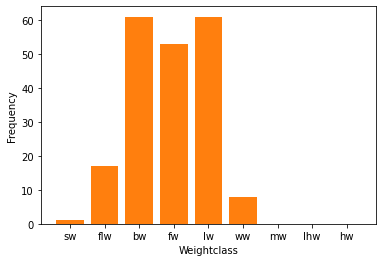

So as you can see, a 172 cm fighter prefers to fight at the top most on the graph above


In [9]:
x = arr_weight
y = ["sw", "flw", "bw", "fw", "lw", "ww", "mw", "lhw", "hw"]
plt.bar(y, x)
plt.xlabel("Weightclass")
plt.ylabel("Frequency")
plt.bar(y,x)
plt.show()
print("So as you can see, a {} cm fighter prefers to fight at the top most on the graph above".format(inputTinggi))

**What is the most utilized striking method used by X cm fighters in the Y weight division?**

                                    and

**What is the most utilized wrestling method used by X cm fighters in the Y weight division?**

In solving these two questions, we will need to use the statistics of the rounds. But looking at the data itself, it looks like most of the statistics have 'NaN' value which will be a problem to take as an indication. We thought of getting rid of / dropping them but by doing that it would take quite some code which isn't effective. So our approach is to create a new data named data_b and data_g that fetch every columns and rows that we want to use excluding the 'NaN' values.


In [10]:
data["strike_dist_body_kicks"] = data['B__Round1_Strikes_Distance Body Kicks_Landed'] + data['B__Round2_Strikes_Distance Body Kicks_Landed'] + data['B__Round3_Strikes_Distance Body Kicks_Landed']
data["strike_dist_body_punches"] = data['B__Round1_Strikes_Distance Body Punches_Landed'] + data['B__Round2_Strikes_Distance Body Punches_Landed'] + data['B__Round3_Strikes_Distance Body Punches_Landed']
data["strike_dist_head_kicks"] = data['B__Round1_Strikes_Distance Head Kicks_Landed'] + data['B__Round2_Strikes_Distance Head Kicks_Landed'] + data['B__Round3_Strikes_Distance Head Kicks_Landed']
data["strike_dist_head_punches"] = data['B__Round1_Strikes_Distance Head Punches_Landed'] + data['B__Round2_Strikes_Distance Head Punches_Landed'] + data['B__Round3_Strikes_Distance Head Punches_Landed']
data["strike_dist_leg_kicks"] = data['B__Round1_Strikes_Distance Leg Kicks_Landed'] + data['B__Round2_Strikes_Distance Leg Kicks_Landed'] + data['B__Round3_Strikes_Distance Leg Kicks_Landed']
data["strike_clinch_strikes"] = data['B__Round1_Strikes_Clinch Total Strikes_Landed'] + data['B__Round2_Strikes_Clinch Total Strikes_Landed'] + data['B__Round3_Strikes_Clinch Total Strikes_Landed']
data["knockdowns"] = data['B__Round1_Strikes_Knock Down_Landed'] + data['B__Round2_Strikes_Knock Down_Landed'] + data['B__Round3_Strikes_Knock Down_Landed']

data["grappling_takedowns_landed"] = data['B__Round1_Grappling_Takedowns_Landed'] + data['B__Round2_Grappling_Takedowns_Landed'] + data['B__Round3_Grappling_Takedowns_Landed']
data["strike_ground_body_strikes_landed"] = data['B__Round1_Strikes_Ground Body Strikes_Landed'] + data['B__Round2_Strikes_Ground Body Strikes_Landed'] + data['B__Round3_Strikes_Ground Body Strikes_Landed']
data["strike_ground_head_strikes_landed"] = data['B__Round1_Strikes_Ground Head Strikes_Landed'] + data['B__Round2_Strikes_Ground Head Strikes_Landed'] + data['B__Round3_Strikes_Ground Head Strikes_Landed']
data["back_control_time"] = data['B__Round1_TIP_Back Control Time'] + data['B__Round2_TIP_Back Control Time'] + data['B__Round3_TIP_Back Control Time']
data["ground_control_time"] = data['B__Round1_TIP_Ground Control Time'] + data['B__Round2_TIP_Ground Control Time'] + data['B__Round3_TIP_Ground Control Time']
data["ground_mount_time"] = data['B__Round1_TIP_Mount Control Time'] + data['B__Round2_TIP_Mount Control Time'] + data['B__Round3_TIP_Mount Control Time']
data["side_control_time"] = data['B__Round1_TIP_Side Control Time'] + data['B__Round2_TIP_Side Control Time'] + data['B__Round3_TIP_Side Control Time']


In [11]:
data_b = data[(data["strike_dist_body_kicks"].notnull()) & (data["strike_dist_body_punches"].notnull()) & (data["strike_dist_head_kicks"].notnull()) & (data["strike_dist_head_punches"].notnull()) & (data["strike_dist_leg_kicks"].notnull()) & (data["strike_clinch_strikes"].notnull()) & (data["knockdowns"].notnull())]
data_g = data[(data["grappling_takedowns_landed"].notnull()) & (data["strike_ground_body_strikes_landed"].notnull()) & (data["strike_ground_head_strikes_landed"].notnull()) & (data["back_control_time"].notnull()) & (data["ground_control_time"].notnull()) & (data["ground_mount_time"].notnull()) & (data["side_control_time"].notnull())]

In [12]:
# data[(data['B_Name']) & (data["B_Height"] == heightA) & (data["B_Weight"] == weightClass)][['B_Name','B_Height', 'B_Weight', 'B__Round1_Strikes_Total Strikes_Landed', 'B__Round2_Strikes_Total Strikes_Landed', 'B__Round3_Strikes_Total Strikes_Landed']]

In [26]:
data_b["strike_dist_body_kicks"] = data_b['B__Round1_Strikes_Distance Body Kicks_Landed'] + data_b['B__Round2_Strikes_Distance Body Kicks_Landed'] + data_b['B__Round3_Strikes_Distance Body Kicks_Landed']
data_b["strike_dist_body_punches"] = data_b['B__Round1_Strikes_Distance Body Punches_Landed'] + data_b['B__Round2_Strikes_Distance Body Punches_Landed'] + data_b['B__Round3_Strikes_Distance Body Punches_Landed']
data_b["strike_dist_head_kicks"] = data_b['B__Round1_Strikes_Distance Head Kicks_Landed'] + data_b['B__Round2_Strikes_Distance Head Kicks_Landed'] + data_b['B__Round3_Strikes_Distance Head Kicks_Landed']
data_b["strike_dist_head_punches"] = data_b['B__Round1_Strikes_Distance Head Punches_Landed'] + data_b['B__Round2_Strikes_Distance Head Punches_Landed'] + data_b['B__Round3_Strikes_Distance Head Punches_Landed']
data_b["strike_dist_leg_kicks"] = data_b['B__Round1_Strikes_Distance Leg Kicks_Landed'] + data_b['B__Round2_Strikes_Distance Leg Kicks_Landed'] + data_b['B__Round3_Strikes_Distance Leg Kicks_Landed']
data_b["strike_clinch_strikes"] = data_b['B__Round1_Strikes_Clinch Total Strikes_Landed'] + data_b['B__Round2_Strikes_Clinch Total Strikes_Landed'] + data_b['B__Round3_Strikes_Clinch Total Strikes_Landed']
data_b["knockdowns"] = data_b['B__Round1_Strikes_Knock Down_Landed'] + data_b['B__Round2_Strikes_Knock Down_Landed'] + data_b['B__Round3_Strikes_Knock Down_Landed']

data_g["grappling_takedowns_landed"] = data_g['B__Round1_Grappling_Takedowns_Landed'] + data_g['B__Round2_Grappling_Takedowns_Landed'] + data_g['B__Round3_Grappling_Takedowns_Landed']
data_g["strike_ground_body_strikes_landed"] = data_g['B__Round1_Strikes_Ground Body Strikes_Landed'] + data_g['B__Round2_Strikes_Ground Body Strikes_Landed'] + data_g['B__Round3_Strikes_Ground Body Strikes_Landed']
data_g["strike_ground_head_strikes_landed"] = data_g['B__Round1_Strikes_Ground Head Strikes_Landed'] + data_g['B__Round2_Strikes_Ground Head Strikes_Landed'] + data_g['B__Round3_Strikes_Ground Head Strikes_Landed']
data_g["back_control_time"] = data_g['B__Round1_TIP_Back Control Time'] + data_g['B__Round2_TIP_Back Control Time'] + data_g['B__Round3_TIP_Back Control Time']
data_g["ground_control_time"] = data_g['B__Round1_TIP_Ground Control Time'] + data_g['B__Round2_TIP_Ground Control Time'] + data_g['B__Round3_TIP_Ground Control Time']
data_g["ground_mount_time"] = data_g['B__Round1_TIP_Mount Control Time'] + data_g['B__Round2_TIP_Mount Control Time'] + data_g['B__Round3_TIP_Mount Control Time']
data_g["side_control_time"] = data_g['B__Round1_TIP_Side Control Time'] + data_g['B__Round2_TIP_Side Control Time'] + data_g['B__Round3_TIP_Side Control Time']

data_strike = data_b[['B_Height', 'B_Weight', 'strike_dist_body_kicks', 'strike_dist_body_punches', 'strike_dist_head_kicks', 'strike_dist_head_punches', 'strike_dist_leg_kicks', 'strike_clinch_strikes', 'knockdowns']]
data_grappling = data_b[['B_Height', 'B_Weight', 'grappling_takedowns_landed', 'strike_ground_body_strikes_landed', 'strike_ground_head_strikes_landed', 'back_control_time', 'ground_control_time', 'ground_mount_time', 'side_control_time']]

<ipython-input-26-f3187d624f47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b["strike_dist_body_kicks"] = data_b['B__Round1_Strikes_Distance Body Kicks_Landed'] + data_b['B__Round2_Strikes_Distance Body Kicks_Landed'] + data_b['B__Round3_Strikes_Distance Body Kicks_Landed']
<ipython-input-26-f3187d624f47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_b["strike_dist_body_punches"] = data_b['B__Round1_Strikes_Distance Body Punches_Landed'] + data_b['B__Round2_Strikes_Distance Body Punches_La

In [27]:
heightA = int(input("Input height A: "))
heightB = int(input("Input height B: "))
weightClass = int(input("Input weight class: "))

Input height A: 172
Input height B: 177
Input weight class: 56


In [28]:
example_data = data_strike[(data_strike['B_Height'] == heightA) & (data_strike['B_Weight'] == weightClass)]
example_data2 = data_strike[(data_strike['B_Height'] == heightB) & (data_strike['B_Weight'] == weightClass)]

In [29]:
example_data3 = data_grappling[(data_grappling['B_Height'] == heightA) & (data_grappling['B_Weight'] == weightClass)]
example_data4 = data_grappling[(data_grappling['B_Height'] == heightB) & (data_grappling['B_Weight'] == weightClass)]

In [30]:
strike_values = example_data.sum()[2:].values.tolist()
strike_data = []
for i in strike_values:
    i = i / example_data.shape[0]
    strike_data.append(i)
print(strike_data)

[0.75, 0.0, 0.375, 6.0, 3.0, 44.125, 0.625]


In [32]:
strike_values2 = example_data2.sum()[2:].values.tolist()
strike_data2 = []
for i in strike_values2:
    i = i / example_data2.shape[0]
    strike_data2.append(i)
print(strike_data2)

[0.0, 0.0, 0.0, 0.0, 0.0, 10.333333333333334, 0.0]


In [33]:
grapple_values = example_data3.sum()[2:].values.tolist()
grapple_data3 = []
for i in grapple_values:
    i = i / example_data3.shape[0]
    grapple_data3.append(i)
print(grapple_data3)

[1.375, 2.25, 17.5, 38.5, 173.75, 57.875, 4.875]


In [34]:
grapple_values2 = example_data4.sum()[2:].values.tolist()
grapple_data4 = []
for i in grapple_values:
    i = i / example_data4.shape[0]
    grapple_data4.append(i)
print(grapple_data4)

[3.6666666666666665, 6.0, 46.666666666666664, 102.66666666666667, 463.3333333333333, 154.33333333333334, 13.0]


In [35]:
strike_names = ['Body kicks', 'Body punches', 'Head kicks', 'Head punches', 'Leg kicks', 'Clinch strikes', 'Knockdowns']
grapple_names = ['Takedowns', 'Ground Body Strikes', 'Ground Head Strikes', 'Back Control', 'Ground Control', 'Mount Control', 'Side Control']

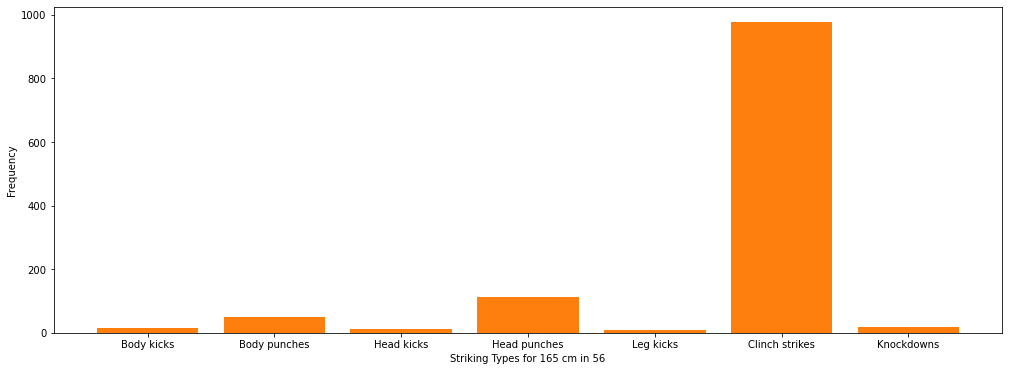

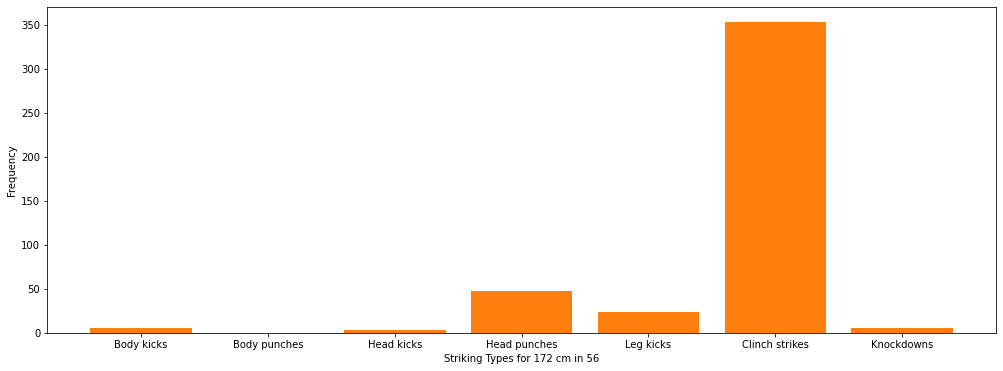

In [22]:
x = strike_values
y = strike_names
plt.figure(figsize=(17, 6))
plt.bar(y, x)
plt.xlabel("Striking Types for {} cm in {}".format(heightA, weightClass))
plt.ylabel("Frequency")
plt.bar(y,x)
plt.show()

x = strike_values2
y = strike_names
plt.figure(figsize=(17, 6))
plt.bar(y, x)
plt.xlabel("Striking Types for {} cm in {}".format(heightB, weightClass))
plt.ylabel("Frequency")
plt.bar(y,x)
plt.show()


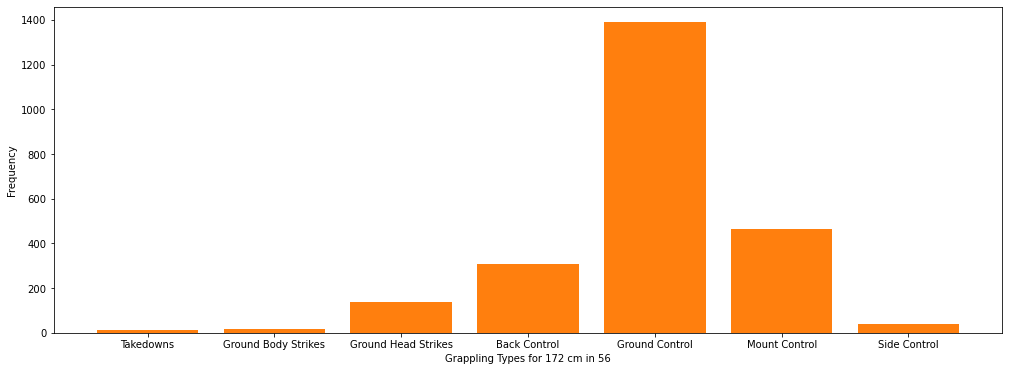

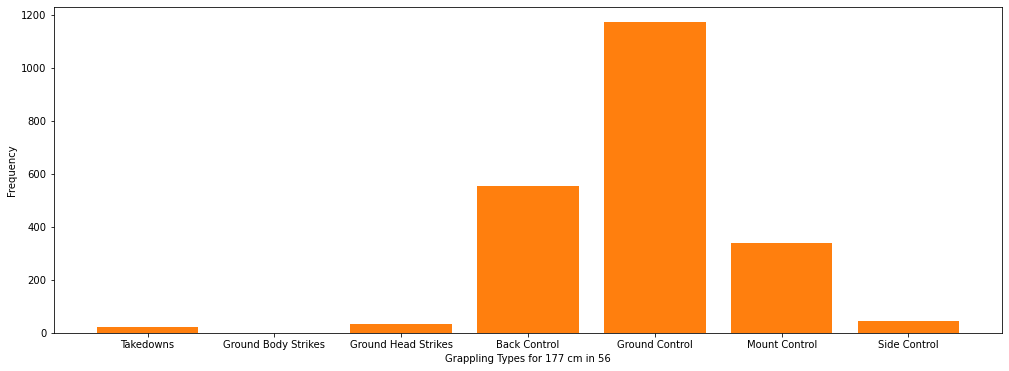

In [36]:
x = grapple_values
y = grapple_names
plt.figure(figsize=(17, 6))
plt.bar(y, x)
plt.xlabel("Grappling Types for {} cm in {}".format(heightA, weightClass))
plt.ylabel("Frequency")
plt.bar(y,x)
plt.show()

x = grapple_values2
y = grapple_names
plt.figure(figsize=(17, 6))
plt.bar(y, x)
plt.xlabel("Grappling Types for {} cm in {}".format(heightB, weightClass))
plt.ylabel("Frequency")
plt.bar(y,x)
plt.show()



From the graphs above we can see the frequency from the data of the fighters with a specific height. We can see the numbers but it's not well distributed because the entries of the frequency differs by number of fighters with the specific height

So in that case, let's see the data divided by the frequency of the fighters with the specific height!

In [24]:
# x = strike_data
# y = strike_names
# plt.figure(figsize=(17, 6))
# plt.bar(y, x)
# plt.xlabel("Grappling Types for {} cm in {}".format(heightA, weightClass))
# plt.ylabel("Frequency")
# plt.bar(y,x)
# plt.show()

# x = strike_data2
# y = strike_names
# plt.figure(figsize=(17, 6))
# plt.bar(y, x)
# plt.xlabel("Grappling Types for {} cm in {}".format(heightB, weightClass))
# plt.ylabel("Frequency")
# plt.bar(y,x)
# plt.show()

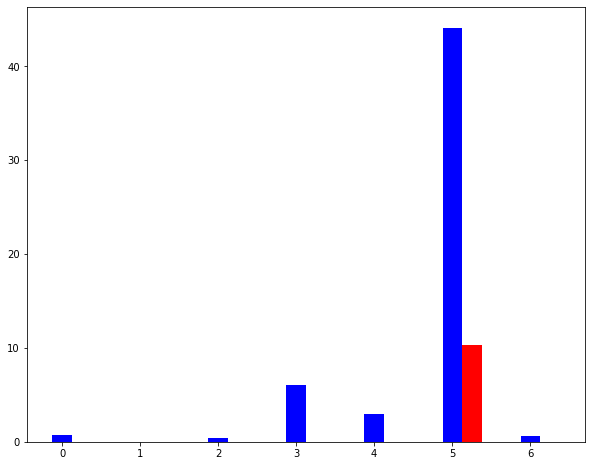

Blue bar is for 172 cm
Red bar is for 177 cm
0: Body kicks
1: Body punches
2: Head kicks
3: Head punches
4: Leg kicks
5: Clinch strikes
6: Knockdowns


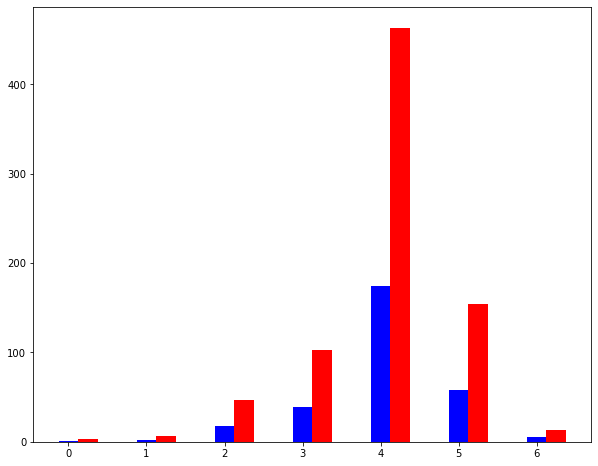

Blue bar is for 172 cm
Red bar is for 177 cm
0: Takedowns
1: Ground Body Strikes
2: Ground Head Strikes
3: Back Control
4: Ground Control
5: Mount Control
6: Side Control


In [37]:
strikingComp = [strike_data, strike_data2]
X = np.arange(7)
plt.figure(figsize=((10,8)))
plt.bar(X + 0.00, strikingComp[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, strikingComp[1], color = 'r', width = 0.25)
plt.show()
print("Blue bar is for {} cm".format(heightA))
print("Red bar is for {} cm".format(heightB))
names = ['Body kicks', 'Body punches', 'Head kicks', 'Head punches', 'Leg kicks', 'Clinch strikes', 'Knockdowns']
for i in names:
    print("{}: {}".format(names.index(i), i))
    
grapplingComp = [grapple_data3, grapple_data4]
X = np.arange(7)
plt.figure(figsize=((10,8)))
plt.bar(X + 0.00, grapplingComp[0], color = 'b', width = 0.25)
plt.bar(X + 0.25, grapplingComp[1], color = 'r', width = 0.25)
plt.show()
print("Blue bar is for {} cm".format(heightA))
print("Red bar is for {} cm".format(heightB))
names2 = ['Takedowns', 'Ground Body Strikes', 'Ground Head Strikes', 'Back Control', 'Ground Control', 'Mount Control', 'Side Control']
for i in names2:
    print("{}: {}".format(names2.index(i), i))    

# Conclusion

Our first analysis question we can determine which weight class most fighters with a specific height fights at by simply creating zero variables for each weight class and increment them every time an iteration of the height in the rows match with the inputed height.

Second and last analysis questions are slightly wandering from my hypothesis because after we tried different samples, the results differs.